# Charge Density

Here code examples for charge and spin densities are given.

**NOTE**

So far due to the efficiency concerns, only 2D densities are available. Developers are working actively to address the 3D plotting issues.

## The 'read_ECHG' method

This method is defined in the `crystal_io.Properties_output` class, which read formatted output files generated by CRYSTAL and return to the `electronics.ChargeDensity` class. Both methods accept the Crgra2006 (fort.25) file.

The standard output of properties calculation is not required as the fort.25 includes all the data.

Read an 'ECHG' calculation and return to a `electronics.ChargeDensity` class. The `data` attribute is a nX\*nY\*nspin array.

In [1]:
from CRYSTALpytools.crystal_io import Properties_output

chg = Properties_output().read_ECHG('dens_grapheneMV.f25')
print('Spin: {:d}'.format(chg.spin))
print('Base vectors (point A, B, C):')
print(chg.base)
print('Data dimensionality:')
print(chg.data.shape)

Spin: 2
Base vectors (point A, B, C):
[[ 6.72393731 -3.93748062  0.        ]
 [ 0.          0.          0.        ]
 [-0.04799071  7.79181692  0.        ]]
Data dimensionality:
(200, 200, 2)


With the `method` input the user can substract the difference of charge between inputs of arbitrary length. Data is substracted from the first entry based on the following entries.

Since the 'spin' dimension is somewhat 'meaningless', the returned object has no spin dimension.

In [2]:
dchg = Properties_output().read_ECHG('dens_grapheneMV.f25',
                                     'dens_grapheneMV_PATO.f25',
                                     method='substract')
print('Spin: {:d}'.format(dchg.spin))
print('Data dimensionality:')
print(dchg.data.shape)

Spin: 1
Data dimensionality:
(200, 200)


## 'electronics.ChargeDensity' class

The `electronics.ChargeDensity` class has object-oriented methods for data analysis and plotting. It is designed to be applicable to systems with 1 to 3D though by July 2024, 3D plotting is still under developing.

### Instantiatation

The classmethod `from_file` is a wrapper of I/O functions introduced above. For spin-polarized systems, the user can also save the data in $\alpha$ and $\beta$ states rather than charge density ($\alpha+\beta$) and spin density ($\alpha-\beta$).

In [3]:
from CRYSTALpytools.electronics import ChargeDensity

chg = ChargeDensity.from_file('dens_grapheneMV.f25', method='alpha_beta')

### Quick plotting

The `plot_2D()` method helps to visualize the charge / spin densities.

Plot them together with default setups (color-filled contour plot):

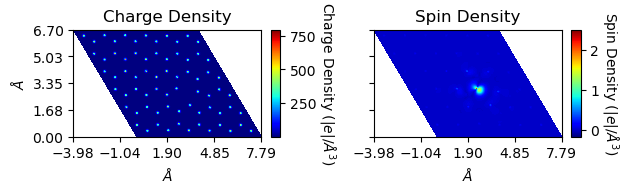

In [4]:
from CRYSTALpytools.electronics import ChargeDensity

fig = ChargeDensity.from_file('dens_grapheneMV.f25').plot_2D()

Not nice. Change the settings of `levels` for plot levels and range, and `figsize` for figure size.

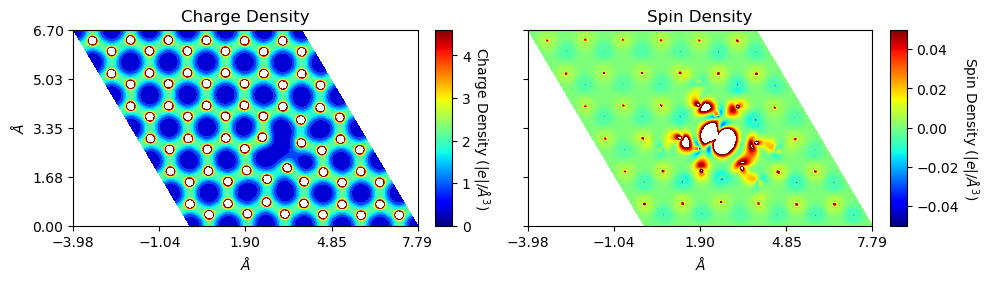

In [5]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 100, 100))
spinlevel = np.linspace(-0.05, 0.05, 100)

chg = ChargeDensity.from_file('dens_grapheneMV.f25')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[10, 8])

In this example, the plot is non-orthogonal. The user can get orthogonal plot by setting `rectangle=True`. The cmode moves the non-orthogonal part on the right to the left hand side, i.e., similar to the 'RECTANGU' keyword of 'MAPNET' (see CRYSTAL manual).

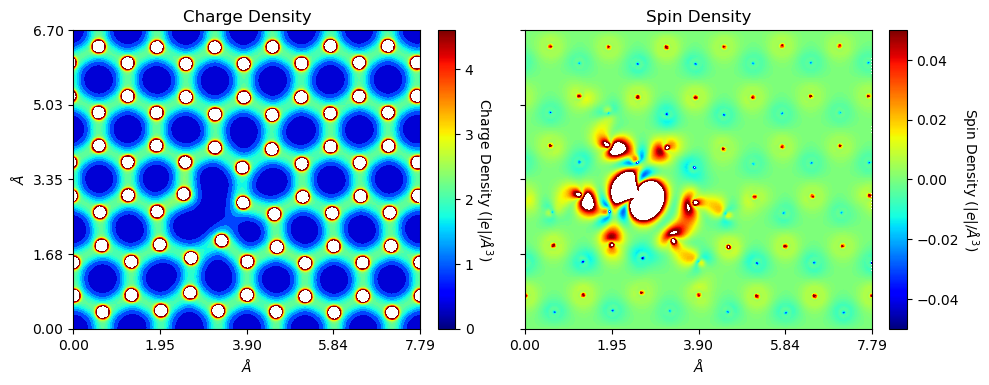

In [6]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 100, 100))
spinlevel = np.linspace(-0.05, 0.05, 100)

chg = ChargeDensity.from_file('dens_grapheneMV.f25')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[10, 8], rectangle=True)

The monovacancy is off-center after rectangle plotting. The user can modify periodicity by setting `a_range` and `b_range`. Both of them uses fractional coordinates of plot base vector. If they are used with `rectangle=True`, that refers to the **old, non-orthogonal** base vectors. The origin of plotting axes are always 0. To avoid influences of periodic boundaries, supercell sizes, i.e., `a_range[1]-a_range[0]` and `b_range[1]-b_range[0]`, must be integers. 

By setting `lineplot=True` and `colorplot=False`, contour lines is plotted. If both are 'True', contour lines are overlapped with color plots (not looking good with this example). Solid lines for positive and 0 values. Dotted lines for negative values.

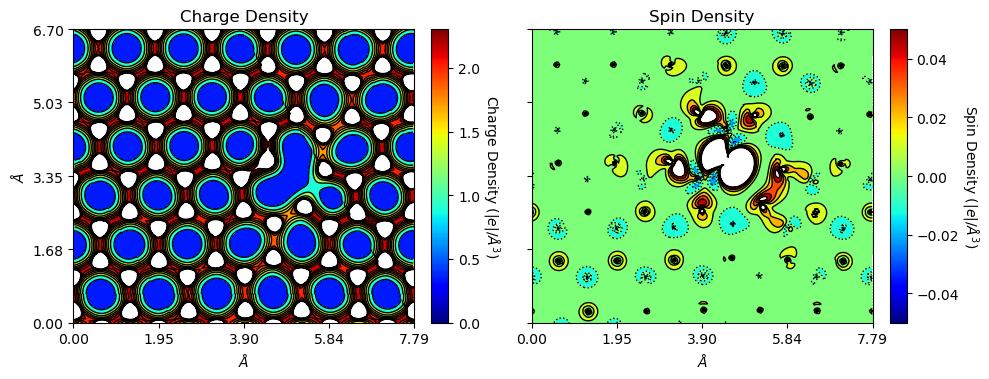

In [7]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 10, 10))
spinlevel = np.linspace(-0.05, 0.05, 10)

chg = ChargeDensity.from_file('dens_grapheneMV.f25')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[10, 8], lineplot=True, colorplot=True,
                  a_range=[-0.3, 0.7], b_range=[-0.1, 0.9], rectangle=True)

With `a_range` and `b_range`, one can also plot supercells. Set `edgeplot=True` to mark unit cell boundaries, which is not influanced by 'range' or 'rectangle' options.

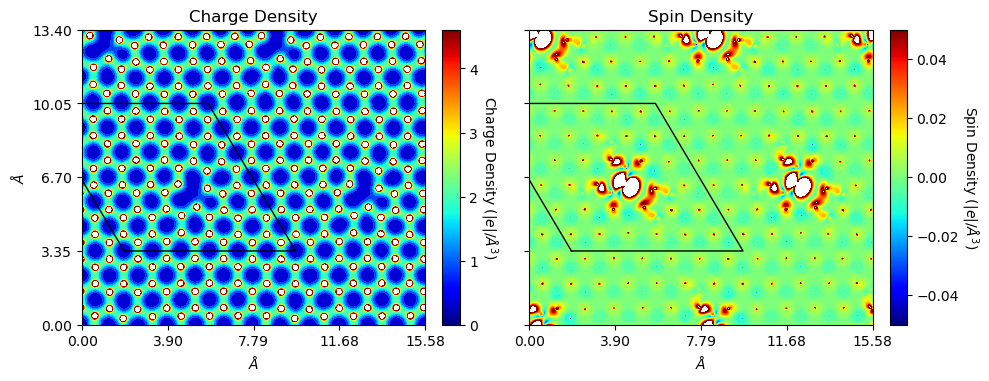

In [8]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 100, 100))
spinlevel = np.linspace(-0.05, 0.05, 100)

chg = ChargeDensity.from_file('dens_grapheneMV.f25')
fig = chg.plot_2D(levels=[chglevel, spinlevel], figsize=[10, 8],
                  a_range=[-0.5, 1.5], b_range=[-0.5, 1.5],
                  rectangle=True, edgeplot=True)

### Analysis

As has illustrated above, the `sustract()` method helps to generate difference maps. The `alpha_beta()` method splits $\alpha$ and $\beta$ densities into the original charge and spin densities.

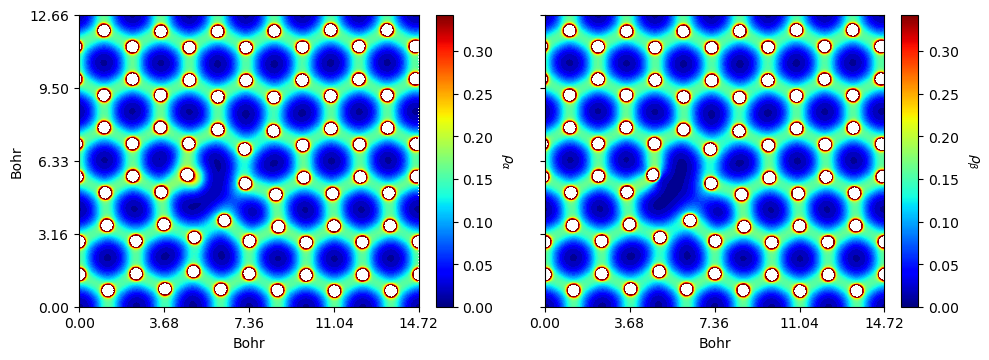

In [9]:
from CRYSTALpytools.electronics import ChargeDensity
import numpy as np

chglevel = np.log(np.linspace(1, 10, 100)) * 0.53**3 # roughly convert AA^-3 to Bohr^-3

chg = ChargeDensity.from_file('dens_grapheneMV.f25', method='alpha_beta')
fig = chg.plot_2D(unit='a.u.', levels=[chglevel, chglevel], figsize=[10, 8],
                  cbar_label=[r'$\rho_{\alpha}$', r'$\rho_{\beta}$'],
                  rectangle=True, add_title=False)

## The 'plot.plot_ECHG()' function

The `plot.plot_ECHG()` function enables a higher-level of plotting. It accepts extendable length of 'fort.25' files or `ChargeDensity` objects.

### Single-system charge / spin density.

By default the charge / spin densities of a single sysmtem is plotted, as the example showed above.

### Multi-system charge / spin densities

`plot_ECHG()` can read entries of arbitrary length and return to lists of plots with the same scale for comparison.

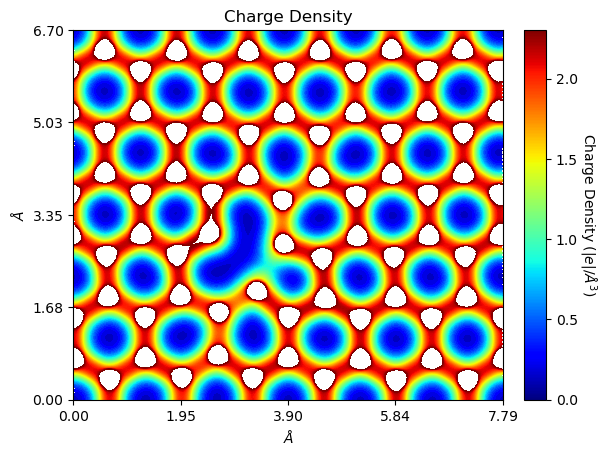

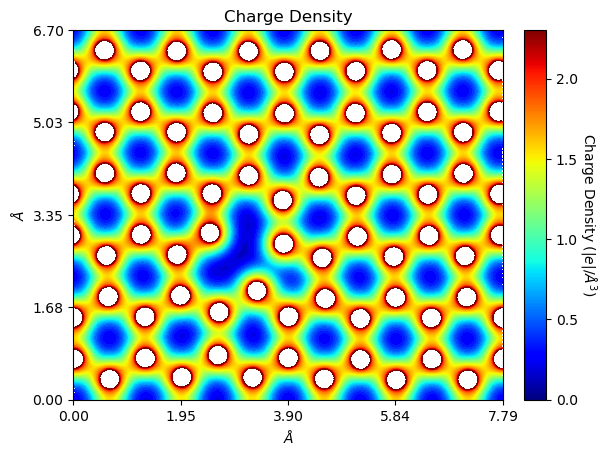

In [10]:
from CRYSTALpytools.plot import plot_ECHG
import numpy as np

chglevel = np.log(np.linspace(1, 10, 100))
files = ['dens_grapheneMV.f25', 'dens_grapheneMV_PATO.f25']

figs = plot_ECHG(*files, option='charge', levels=chglevel, rectangle=True)

With `option='diff'`, the user can quickly plot charge difference maps. It returns to non spin-polarized solution (`obj.spin=1`) as only charge density difference is considered. 

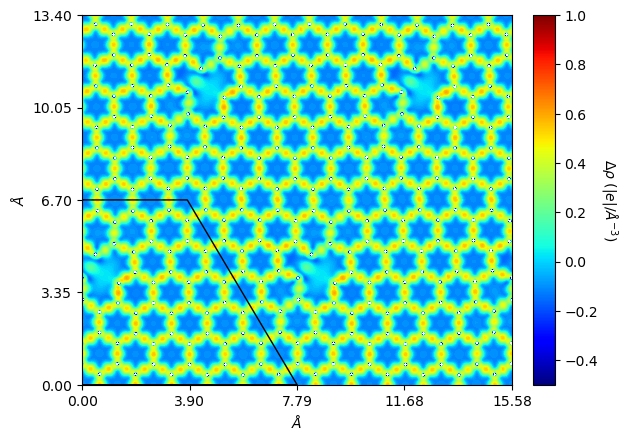

In [11]:
from CRYSTALpytools.plot import plot_ECHG
import numpy as np

chglevel = np.linspace(-0.5, 1, 100)
files = ['dens_grapheneMV.f25', 'dens_grapheneMV_PATO.f25']

figs = plot_ECHG(*files, option='diff', levels=chglevel, rectangle=True,
                 a_range=[0, 2], b_range=[0, 2], edgeplot=True,
                 add_title=False, cbar_label=r'$\Delta\rho$ ($|e|/\AA^{-3}$)')

For more details, please refer to the module specific documentations.